In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

In [28]:
df=pd.read_csv('college_student_placement_cleaned.csv')

In [29]:
df.head()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,107,6.61,6.28,8,0,8,8,4,0
1,97,5.52,5.37,8,0,7,8,0,0
2,109,5.36,5.83,9,0,3,1,1,0
3,122,5.47,5.75,6,1,1,6,1,0
4,96,7.91,7.69,7,0,8,10,2,0


In [30]:
X=df.drop(columns=['Placement'],axis=1)
y=df['Placement']

In [31]:
X

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed
0,107,6.61,6.28,8,0,8,8,4
1,97,5.52,5.37,8,0,7,8,0
2,109,5.36,5.83,9,0,3,1,1
3,122,5.47,5.75,6,1,1,6,1
4,96,7.91,7.69,7,0,8,10,2
...,...,...,...,...,...,...,...,...
9995,119,8.41,8.29,4,0,1,8,0
9996,70,9.25,9.34,7,0,0,7,2
9997,89,6.08,6.25,3,1,3,9,5
9998,107,8.77,8.92,3,0,7,5,1


In [32]:
y.value_counts()

Placement
0    8341
1    1659
Name: count, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [34]:
X_train.corr()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed
IQ,1.000000,0.010433,0.007766,-0.005204,-0.006797,-0.009991,-0.011695,0.023927
Prev_Sem_Result,0.010433,1.000000,0.980963,0.009097,-0.019606,0.003838,-0.013292,0.015836
CGPA,0.007766,0.980963,1.000000,0.013915,-0.018935,0.004878,-0.015509,0.017292
Academic_Performance,-0.005204,0.009097,0.013915,1.000000,0.020275,0.017932,-0.011730,-0.016318
Internship_Experience,-0.006797,-0.019606,-0.018935,0.020275,1.000000,0.009757,-0.011678,-0.008869
Extra_Curricular_Score,-0.009991,0.003838,0.004878,0.017932,0.009757,1.000000,0.006291,-0.004005
Communication_Skills,-0.011695,-0.013292,-0.015509,-0.011730,-0.011678,0.006291,1.000000,-0.000530
Projects_Completed,0.023927,0.015836,0.017292,-0.016318,-0.008869,-0.004005,-0.000530,1.000000


<Axes: >

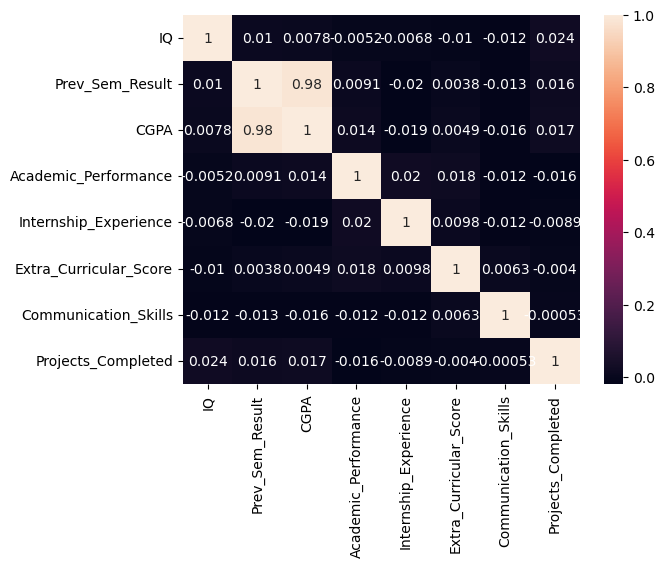

In [35]:
sns.heatmap(X_train.corr(),annot=True)

In [36]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

Text(0.5, 1.0, 'after scaling')

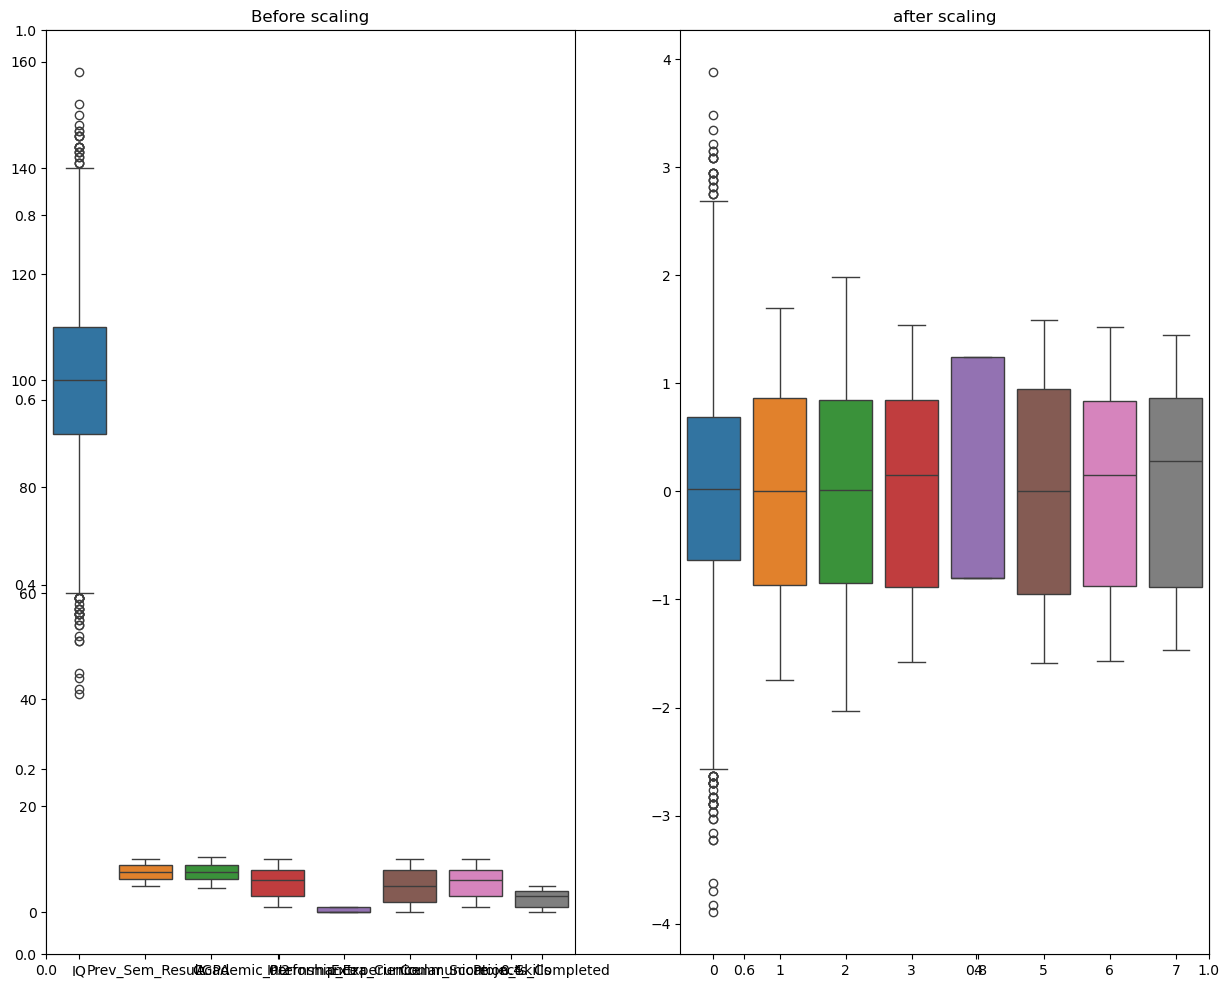

In [37]:
plt.subplots(figsize=(15,12))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('Before scaling')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title('after scaling')

## Model Training


In [38]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,root_mean_squared_error,r2_score

In [39]:
def evaluate_model(true_value,predicted_value):
    mae=mean_absolute_error(true_value,predicted_value)
    rmse=root_mean_squared_error(true_value,predicted_value)
    score=r2_score(true_value,predicted_value)

    return mae,rmse,score

In [ ]:
models={
    "linearReg":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "DT":DecisionTreeRegressor(),
    "KNN":KNeighborsRegressor(),
    "GB":GradientBoostingRegressor(),
    "AB":AdaBoostRegressor(),
    "RF":RandomForestRegressor()
}
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train_scaled,y_train)
    y_pred=model.predict(X_test_scaled)

    model_mae,model_rmse,model_score=evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    
    print('----------------------------------') 

    print(f"mae: {model_mae}")
    print(f"rmse: {model_rmse}")
    print(f"model_score: {model_score}")

linearReg
----------------------------------
mae: 0.2374504572142402
rmse: 0.3006661092125209
model_score: 0.33147274605605315
Lasso
----------------------------------
mae: 0.2751864314789689
rmse: 0.36779305169156973
model_score: -0.0003620372887978007
Ridge
----------------------------------
mae: 0.23744509224612342
rmse: 0.3006647930964796
model_score: 0.33147859877766217
DT
----------------------------------
mae: 0.0009090909090909091
rmse: 0.03015113445777636
model_score: 0.9932770872267374
KNN
----------------------------------
mae: 0.09012121212121213
rmse: 0.20476150206343166
model_score: 0.6899392628971271
GB
----------------------------------
mae: 0.08861355234983133
rmse: 0.13337669361421378
model_score: 0.8684441830302017
AB
----------------------------------
mae: 0.0762940239132554
rmse: 0.1736102369958951
model_score: 0.7771047458979334
RF
----------------------------------
mae: 0.0008181818181818183
rmse: 0.022707627873390115
model_score: 0.9961867638750055


## Hyperparameter tuning

In [41]:
dt_param={
    'criterion':['squared_error','friedman_mse','absolute_error'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5,10,15,20,25],
    'max_features':['auto','sqrt','log2']
}
rf_param={
    "max_depth": [5, 8, 15, None, 10],
    "max_features": [5, 7, "auto", 8],
    "min_samples_split": [2, 8, 15, 20],
    "n_estimators": [100, 200, 500, 1000]
}

In [42]:
randomcv_model=[
    ("DT",DecisionTreeRegressor(),dt_param),
    ("RF",RandomForestRegressor(),rf_param)
]

In [43]:
randomcv_model

[('DT',
  DecisionTreeRegressor(),
  {'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
   'splitter': ['best', 'random'],
   'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
   'max_features': ['auto', 'sqrt', 'log2']}),
 ('RF',
  RandomForestRegressor(),
  {'max_depth': [5, 8, 15, None, 10],
   'max_features': [5, 7, 'auto', 8],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500, 1000]})]

In [44]:
from sklearn.model_selection import RandomizedSearchCV

In [45]:
model_params={}
for name,model,param in randomcv_model:
    random=RandomizedSearchCV(estimator=model,param_distributions=param,n_iter=100,cv=3,verbose=2,n_jobs=-1)
    random.fit(X_train_scaled,y_train)
    model_params[name]=random.best_params_

for model_name in model_params:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_params[model_name])


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
---------------- Best Params for DT -------------------
{'splitter': 'best', 'max_features': 'log2', 'max_depth': 20, 'criterion': 'squared_error'}
---------------- Best Params for RF -------------------
{'n_estimators': 200, 'min_samples_split': 2, 'max_features': 8, 'max_depth': 15}


In [47]:
models={
    "RF":RandomForestRegressor(n_estimators= 200,min_samples_split= 2, max_features= 8, max_depth=15),
    "DT":DecisionTreeRegressor(splitter='best',max_features='log2',max_depth=20,criterion='squared_error')
}

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train_scaled,y_train)
    y_pred=model.predict(X_test_scaled)

    model_mae,model_rmse,model_score=evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    
    print('----------------------------------')

    print(f"mae: {model_mae}")
    print(f"rmse: {model_rmse}")
    print(f"model_score: {model_score}")


RF
----------------------------------
mae: 0.000781818181818182
rmse: 0.022258127558809668
model_score: 0.9963362366356643
DT
----------------------------------
mae: 0.0036363636363636364
rmse: 0.06030226891555272
model_score: 0.9731083489069494


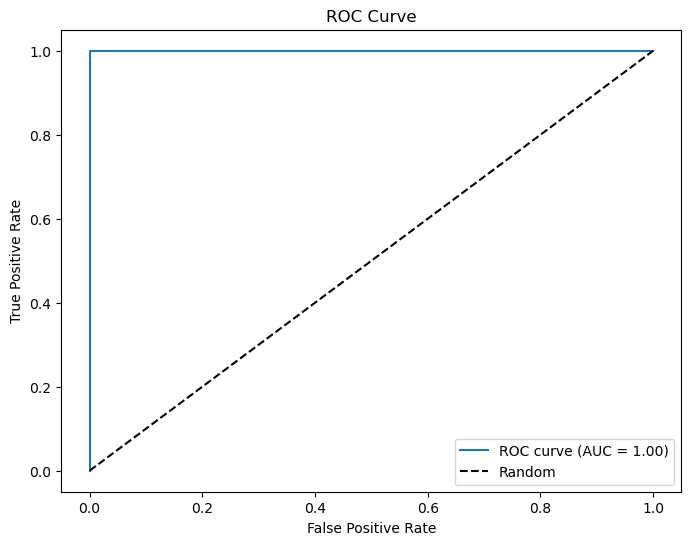

In [69]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities for the positive class
y_proba = RF.predict(X_test_scaled)

# Compute ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [54]:
RF=RandomForestRegressor(n_estimators= 200,min_samples_split= 2, max_features= 8, max_depth=15)
RF.fit(X_train_scaled,y_train)

RandomForestRegressor(max_depth=15, max_features=8, n_estimators=200)

In [55]:
scaler

StandardScaler()

In [56]:
RF

RandomForestRegressor(max_depth=15, max_features=8, n_estimators=200)

In [57]:
import pickle
pickle.dump(scaler,open('../models/scaler.pkl','wb'))
pickle.dump(RF,open('../models/rf.pkl','wb'))